In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


Accuracy: 0.83

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430


Confusion Matrix:
[[246  31]
 [ 44 109]]


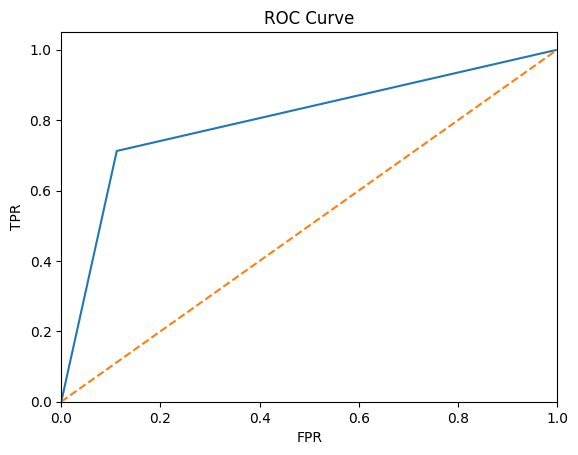

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#loading dataset and separating into X & y, then splitting into test and train set of X & y
d = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')
X = d.drop('Diagnosis', axis=1)
y = d['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train.dtypes)

#Preprocessing by converting string types to integers
cc = X_train.select_dtypes(include=['object']).columns.tolist() #selecting categorical columns
#doing one-hot encoding on X_train and X_test to make them into binary
X_train = pd.get_dummies(X_train, columns=cc)
X_test = pd.get_dummies(X_test, columns=cc)


#initializing standardscaler and doing fit transform on the data
scaler = StandardScaler()
Xtrainsc = scaler.fit_transform(X_train) #fitting and transforming together on X_train
Xtestsc = scaler.transform(X_test)   #only need to transofrm X_test

#initialize logistic regression, fitting it, then predicting.
model = LogisticRegression()
model.fit(Xtrainsc, y_train)
ypred = model.predict(Xtestsc)

#evaluating using accuracy and roc curve
accuracy = accuracy_score(y_test, ypred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report: ')
print(classification_report(y_test, ypred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, ypred))

#making roc curve and plotting it
fpr, tpr, a = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr,label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       281
           1       0.81      0.74      0.77       149

    accuracy                           0.85       430
   macro avg       0.84      0.82      0.83       430
weighted avg       0.85      0.85      0.85       430


Confusion Matrix:
[[255  26]
 [ 39 110]]


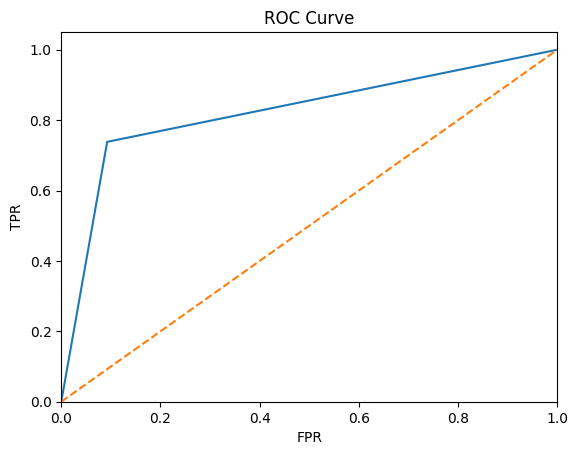

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#loading dataset and separating it into X, y, then splitting it
d = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')
X = d.drop('Diagnosis', axis=1)
y = d['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
#print(X_train.dtypes)

#preprocessing string type columns using get_dummies
cc = X_train.select_dtypes(include=['object']).columns.tolist()
#doing one-hot encoding on X_train and X_test to make them into binary
X_train = pd.get_dummies(X_train, columns=cc)
X_test = pd.get_dummies(X_test, columns=cc)

#initializing standardscaler and doing fit_transform on columns
scaler = StandardScaler()
Xtrainsc = scaler.fit_transform(X_train)
Xtestsc = scaler.transform(X_test)

#creating SVM model with rbf kernel, training model and predicting on X_test
mod = SVC(kernel='rbf')   #better than linear or poly
mod.fit(Xtrainsc, y_train)
ypred = model.predict(Xtestsc)

#evaluating the model
accuracy = accuracy_score(y_test, ypred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, ypred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, ypred))

#making roc curve and plotting it
fpr, tpr, a = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr,label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       256
           1       0.88      0.77      0.82       174

    accuracy                           0.87       430
   macro avg       0.87      0.85      0.86       430
weighted avg       0.87      0.87      0.86       430


Confusion Matrix:
[[238  18]
 [ 40 134]]


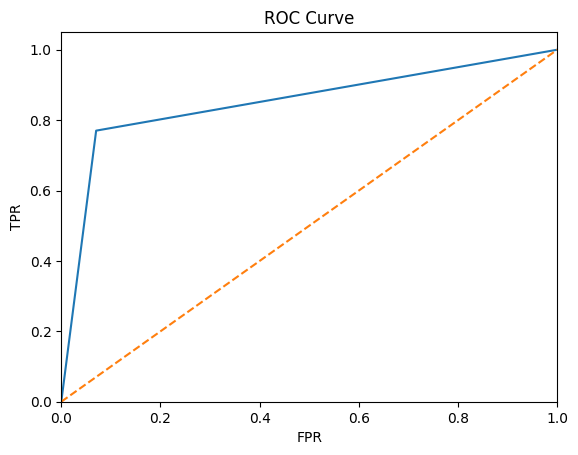

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#loading dataset, separating into X and y, then splitting it into test and train set
d = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')
X = d.drop('Diagnosis', axis=1)
y = d['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
#print(X_train.dtypes)

#preprocessing string type columns
cc = X_train.select_dtypes(include=['object']).columns.tolist()
#doing one-hot encoding on X_train and X_test to make them into binary
X_train = pd.get_dummies(X_train, columns=cc)
X_test = pd.get_dummies(X_test, columns=cc)

#initializing standardscaler, doing fit_transform on X_train
scaler = StandardScaler()
Xtrainsc = scaler.fit_transform(X_train)
Xtestsc = scaler.transform(X_test)

#initializing decision tree and training model, then predicting
mod = DecisionTreeClassifier(random_state=34)
mod.fit(Xtrainsc, y_train)
ypred = model.predict(Xtestsc)

#evaluating model
accuracy = accuracy_score(y_test, ypred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, ypred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, ypred))

#making roc curve and plotting it
fpr, tpr, a = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr,label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()
